# Problem 3: Scatter plots

Assignment and target figure from [Earth and Environmental Data Science](https://earth-env-data-science.github.io/assignments/more_matplotlib.html).

Target size figure is 866 x 496 pixels.

**Target Figure:**

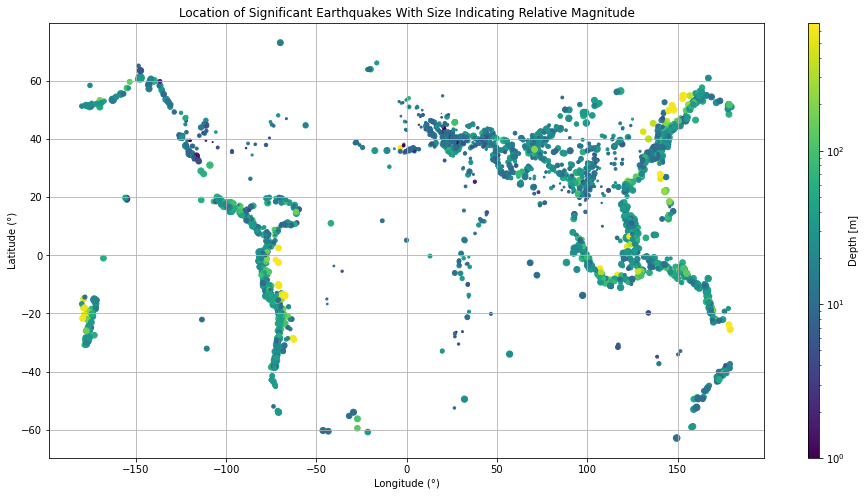

## Code provided by tutorial

Here we will make a map plot of earthquakes from a USGS catalog of historic large earthquakes. Color the earthquakes by log10(depth) and adjust the marker size to be magntiude^4/100

In [1]:
import pooch
import numpy as np

In [2]:
fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

## Code written by myself

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors


In [4]:
monitor_dpi = 93                       # DPI of monitor I am using
target_size = (866, 496)               # Size of target figure in pixels
figsize = (866 / 93, 496 / 93)         # Set figsize in inches which will produce a figure of the same size in pixels as the target figure
figsize

(9.311827956989248, 5.333333333333333)

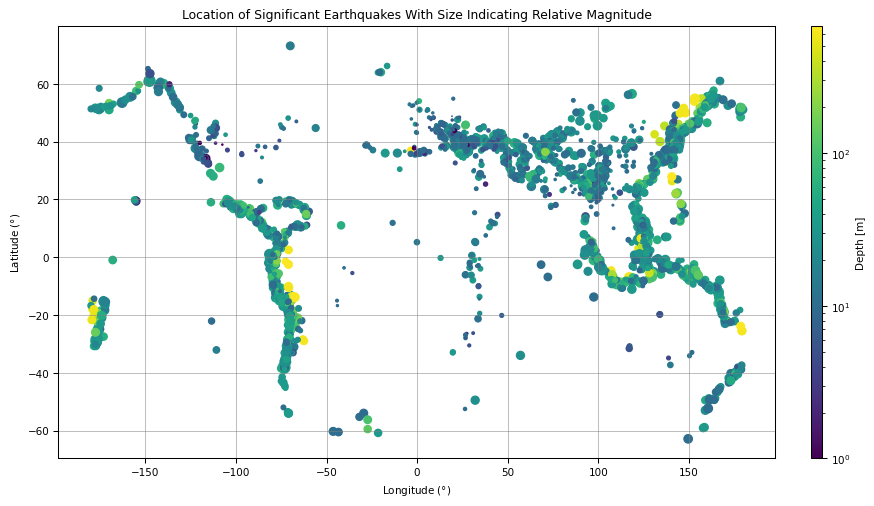

In [5]:
plt.rcParams.update({'font.size': 8})

fig, ax = plt.subplots(figsize = figsize, dpi = monitor_dpi, facecolor = 'w', layout = 'constrained')

sctr = ax.scatter(longitude, latitude, s = np.power(magnitude, 4) / 100, c = depth, norm = colors.LogNorm())

ax.set_title('Location of Significant Earthquakes With Size Indicating Relative Magnitude')
ax.set_ylabel('Latitude ($\degree$)')
ax.set_xlabel('Longitude ($\degree$)')
ax.grid(which = 'major', linestyle = '-', color = 'grey', alpha = 0.5)

fig.colorbar(sctr, location = 'right', aspect = 40, label = 'Depth [m]')

plt.savefig('Scatter Assignment.png')